In [ ]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

One very iportant concept, especially for machine learning, is examining the relationship between two varaibles.
Take height and weight - as you look at taller people, they probably get heavier, but the relationship isn't exact. Danny DeVito is 4'8" and 194lb, NBA player Lonzo Ball is listed as 6'6" and 190lb! Clearly there's some variation in there.

We can analyze and measure the strength of these relationships of one varaible to another, and use that to better undertand our data, and do things like select varaibles for machine learning. 

A primary tool for examining these relationships is a scatter plot - one varaible on the X axis, the other on the Y, and a point for each value. The shape that all these points create will illustrate the relationship

In [ ]:
#Load hieght weight data. 
df = pd.read_csv("cardio_train.csv", sep=";")
df.describe()

In [ ]:
df.head()

In [ ]:
#Change the days into years, so it is more understandable
df["age"] = round(df["age"]/365, 0)
df.head()

In [ ]:
#Create a scatterplot. Note scatterplots don't really need a preceeding object like a hist, it is just mapping points on a plot.
thinkplot.Scatter(df["height"], df["weight"])
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

As people get taller, they get heavier. It isn't an extremely clear relationship though. 

In [ ]:
#Add jitter
thinkplot.Scatter(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]), alpha=.3)
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

In [ ]:
#Hexbin
thinkplot.HexBin(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]))
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

All of these visualizations show the same basic thing - the relationship between height and weight. 

We can measure the strength of that relationship, that's called correlation.

In [ ]:
#Calculate both correlation metrics
a=df["height"].values.tolist()
b=df["weight"].values.tolist()
thinkstats2.Corr(a, b), thinkstats2.SpearmanCorr(a,b)
#a,b

In [ ]:
#Cut down data to only numeric values, and fliter out some outliers. 
df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

In [ ]:
#Generate pairplot
sns.pairplot(df2, dropna=True, hue="gender")
plt.show()

In [ ]:
#Generate regression plot (pretty scatterplot with regression)
sns.regplot(x=df2["height"], y=df2["weight"], robust=True, data=df2, n_boot=1000, x_jitter=.2, y_jitter=.2, ci=85)

We can now load some different data, do some data cleanup, and look at correlations a bit more. 

In [ ]:
#Load drug dataset and drop some values, so the total volume of data is manageable. 
drg = pd.read_csv("drug-use-by-age.csv")
drg = drg.drop(columns=["n", 'alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency',
    'pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency', 'pain-releiver-use', 'stimulant-use'])
drg.head()

In [ ]:
#Generate pairplot
sns.pairplot(drg, dropna=True, kind="reg")
plt.show()

In [111]:
#Take the data in our dataframe, and change it into a set of correlations. 
drg2 = drg.apply(pd.to_numeric, errors='coerce')
drg2 = drg2.drop(columns=["age"])
drg2 = drg2.corr()
drg2.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,oxycontin-use,tranquilizer-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.589219,0.735785,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.971733,0.935199,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.865626,0.920430,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.603003,0.772651,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.775321,0.818583,0.816620,0.333649


In [ ]:
#Show Correlations in heatmap
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(drg2, dtype=bool))
sns.heatmap(drg2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

We can use our newfound correlation skills to look at something near and dear to my heart - diabetes!

In this data we have a bunch of common values that are tracked for diabetic people, the Outcome varaible is a measure of if that person has diabetes. 

Part 1: Load some data and take a preview. Look for correlations visually and calculate some that appear to be correlated numerically. 

In [ ]:
#Read Diabetic Data and change to mmol/L, ditch 0 glucose (errors)
d = pd.read_csv("diabetes.csv")
d["Glucose"] = d["Glucose"]/18.018
d = d[d["Glucose"] > 0]
d.head()

In [ ]:
#Describe data
d.describe(include="all")

In [ ]:
#Look for correlations visually
sns.pairplot(d, dropna=True, kind="reg")
plt.show()

In [ ]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d["BMI"], d["SkinThickness"]), thinkstats2.SpearmanCorr(d["BMI"], d["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d["Glucose"], d["Insulin"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d["Glucose"], d["BloodPressure"]), thinkstats2.SpearmanCorr(d["Glucose"], d["BloodPressure"]))

One thing jumped out there - there are several things with 0 or near 0 values that don't make sense, e.g. Blood Pressure. 

We should clean up our data and then look again. 

NOTE: Do not filter out 0 Insulin people, that is a valid measure. 
Part 2: Refine our examination. This time, add: hue="Outcome" as an argument in the pairplot. 

In [ ]:
#Filter out 0s. Rerun graphs. 
d = d[d["BloodPressure"] > 0]
d = d[d["SkinThickness"] > 0]
d = d[d["BMI"] > 0]

In [ ]:
#Look for correlations visually
sns.pairplot(d, dropna=True, kind="reg", hue="Outcome")
plt.show()

That cleans up our data a little. Since this data is about a glucose test, we can detour to examine glucose more closely...

Part 3: Examine the distribution of glucose:

In [ ]:
#Look at glucose overall first. 
thinkplot.PrePlot(2,1,2)
pmf = thinkstats2.Pmf(round(d["Glucose"], 0))
thinkplot.Pdf(pmf)
thinkplot.SubPlot(2)
hist = thinkstats2.Hist(round(d["Glucose"],0))
thinkplot.Hist(hist)
thinkplot.Config()

In [ ]:
#Split by if you're diabetic or not. 
#NOTE THIS ONE USES A NEW SNS FUNCTION. IT MAY NOT WORK FOR YOU. USE DISTPLOT LIKE THE PREVIOUS EXAMPLE AND ADAPT IT
#OR USE THINKPLOT LIKE ABOVE. THIS DEPENDS ON THE VERSION OF SEABORN THAT IS INSTALLED ON YOUR COMPUTER, NOT ANYTHING YOU'VE DONE.
sns.displot(data=d, x="Glucose", kde=True, col="Outcome")

Whoa! Way different. Diabetic people are in shambles and normal people are... well... normal. 

We can take our normal people and treat them as normal - quick detour into analytical distributions....

Part 4: Take non diabetic people and create analytical distribution for them. 

In [ ]:
#Non-Diabetic people are normal!
d_neg = d[d["Outcome"]==0]
thinkstats2.NormalProbabilityPlot(d_neg["Glucose"])

The normal probability plot looks pretty good. Why don't we make an analytical distribution out of our data?

In [ ]:
#Create a normal distribution. Because we have stated "it is normal", we only need mean and std to define it. 
norm = ss.norm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std())
#Print some stats... Note mean and median. 
norm.cdf(6), norm.median(), norm.mean()

In [ ]:
#Create a histogram - We will take our new distribution and create some random values mirroring that
sns.distplot(norm.rvs(size=10000), color="blue")
sns.distplot(d_neg["Glucose"], color="red")
plt.show()

By doing what we just did there, we effectively said - this is the distribution of glucose for non-diabetics, it is defined by this formula. The "ss.norm..." generates that formula if you provide mean and std. We can use that new analytical model to do stuff, like graph....

What may be concerning about that...?

Our distribution is more or less normal, but not perfect. Maybe we should consider the skew, and try to make it more accurate?

Part 5: Try to make more accurate analytic models

In [ ]:
#What about muh skew?
#Skewnorm is another distribution - a normal one with some skew. We calculate it, and pass it to our distribution with a=
a = thinkstats2.PearsonMedianSkewness(d_neg["Glucose"])
norms = ss.skewnorm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std(), a=a)
norms.cdf(6), norms.median(), norms.mean(), a

We can also just tell the system to figure it out for us....

In [ ]:
#Create a model that is fitted to the data, automagically.
ae, loce, scalee = ss.skewnorm.fit(d_neg["Glucose"])
snormFit = ss.skewnorm(ae, loce, scalee)


In [ ]:
#Plot all the distributions together. 
sns.distplot(norms.rvs(size=100000), color="red")
sns.distplot(norm.rvs(size=100000), color="blue")
sns.distplot(snormFit.rvs(size=100000), color="yellow")
sns.distplot(d_neg["Glucose"], color="green")
plt.show()

Once we have an analytical distribution that mirrors our data closely enough, we can use it. Some caveats:

- The more data we have, the more likely we are able to make an accurate model. Generalizing from a small amount of data is more risky. 

- The closer the distribution is to the distribution you pick, the better. Many are normal, but not all. 

- Does our sample realistically match the population we are modelling? For us, this data comes from a glucose tolerance test, which is one way that doctors diagnose diabetes. You're given a glass of orange juice, then your blood sugar is measured 2 hours later. If it is really high, you're probably diabetic. Most people who have no medical issues wouldn't do this, so we probably should expect our data to be different than the total population. 

In [ ]:
#How many people have a blood glucose in an optimal range (3.9-5.4)
low = 3.9
high = 5.4

cdfNeg = thinkstats2.Cdf(d_neg["Glucose"])

print("Normal Distribution:", norm.cdf(high)-norm.cdf(low))
print("Skew Distribution:", norms.cdf(high)-norms.cdf(low))
print("Fitted Distribution:", snormFit.cdf(high)-snormFit.cdf(low))
print("Fitted Distribution:", cdfNeg.Prob(high)-cdfNeg.Prob(low))

Enough with the normies, we can go back to looking at diabetics.

For people with diabetes, inspect for correlations. 

Part 6: Dead pancreas society

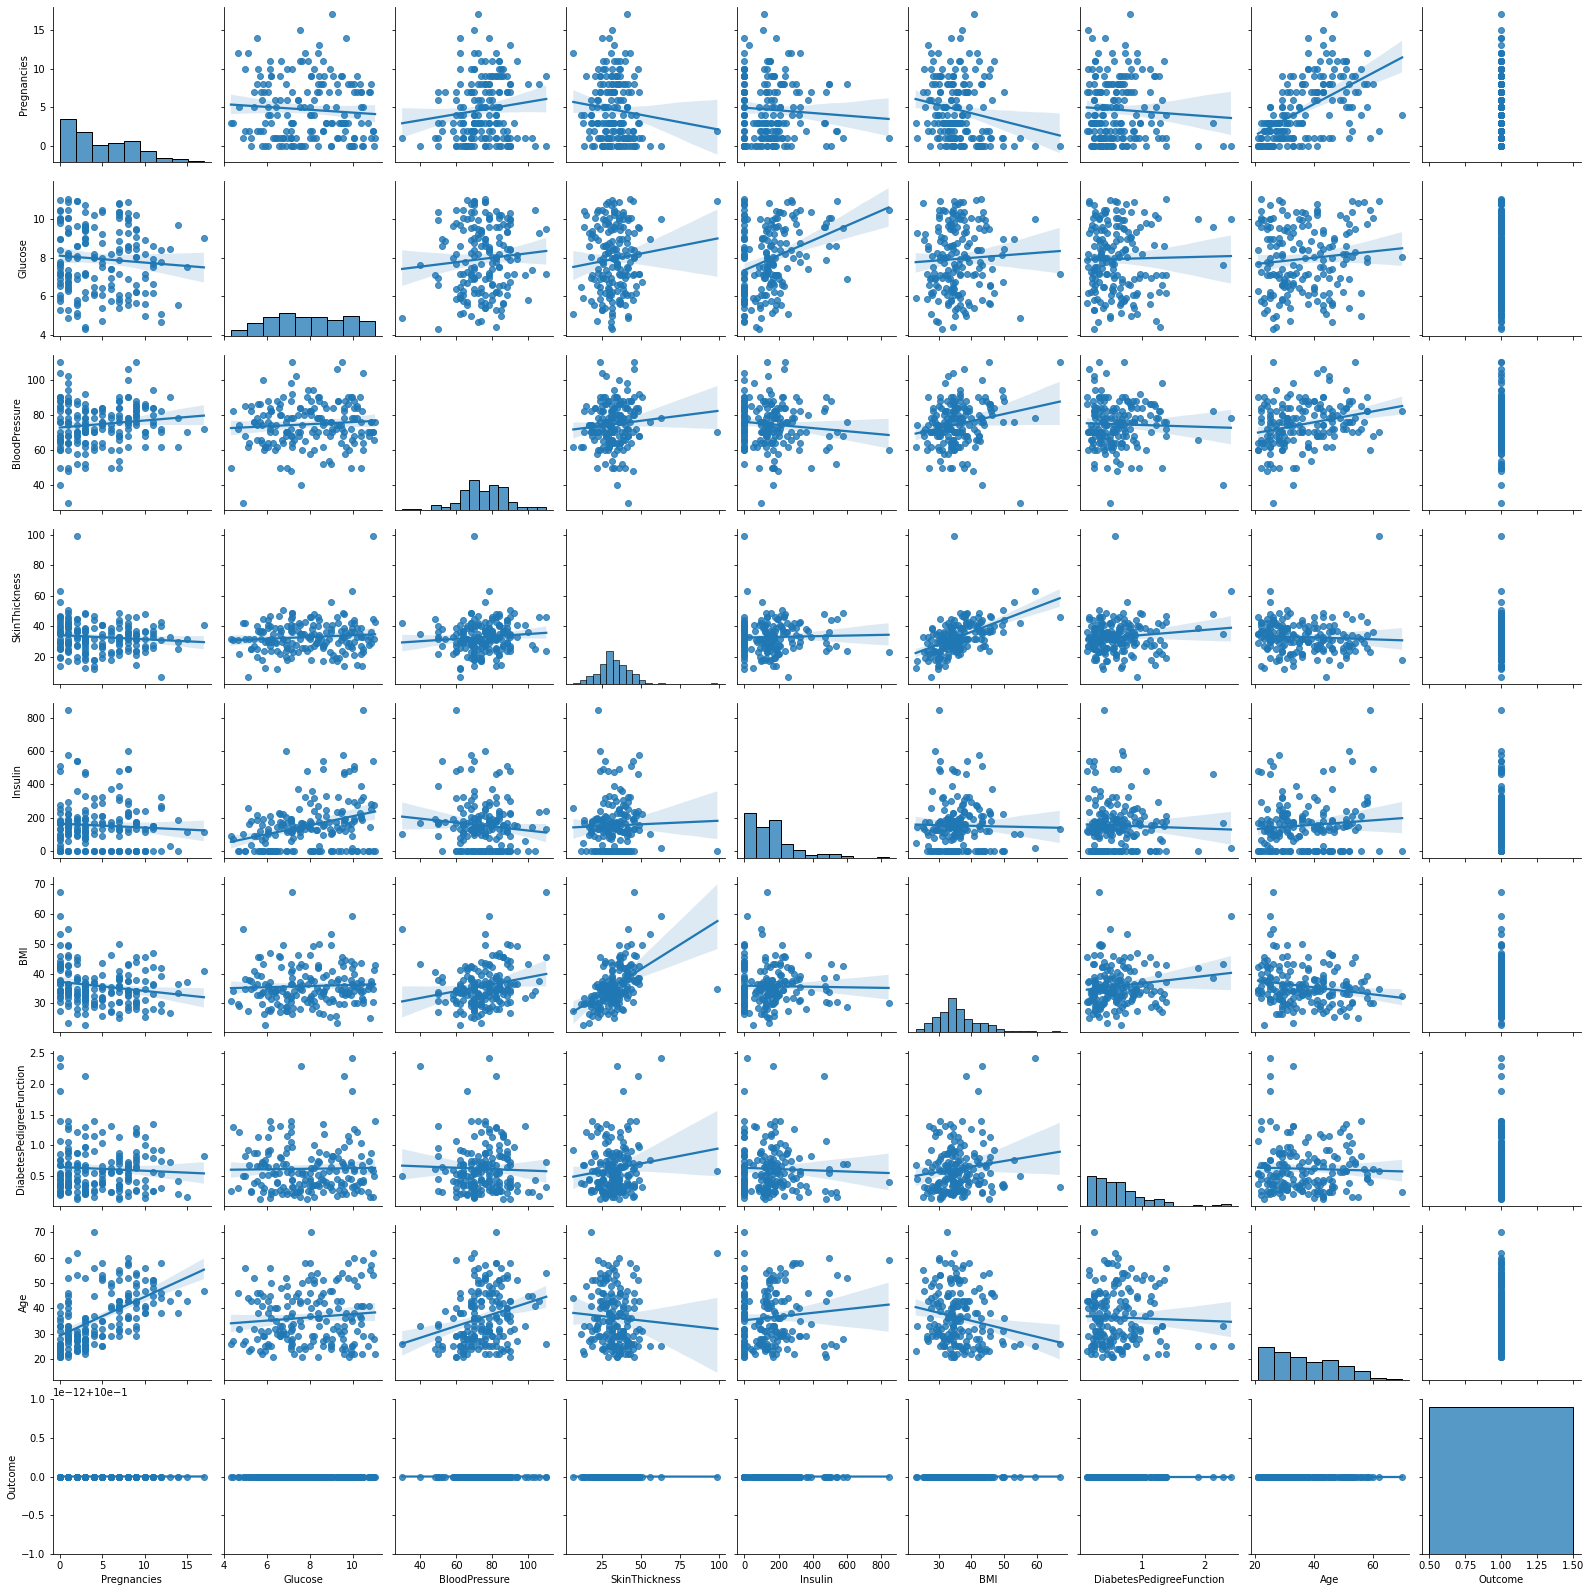

In [112]:
#Take diabetic people and look for correlations
d_pos = d[d["Outcome"] == 1]
sns.pairplot(d_pos, dropna=True, kind="reg")
plt.show()

In [ ]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d_pos["BMI"], d_pos["SkinThickness"]), thinkstats2.SpearmanCorr(d_pos["BMI"], d_pos["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d_pos["Glucose"], d_pos["Insulin"]), thinkstats2.SpearmanCorr(d_pos["Glucose"], d_pos["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d_pos["Glucose"], d_pos["BloodPressure"]), thinkstats2.SpearmanCorr(d_pos["Glucose"], d_pos["BloodPressure"]))

Part 7: Correlation Matrix for diabetics. 

In [122]:
#Create correlation dataframe
tmp = d_pos.drop(columns=["Outcome"])
posCor = tmp.corr()
posCor.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HaveIns
Pregnancies,1.000000,-0.080580,0.125040,-0.101702,-0.064018,-0.179583,-0.060414,0.553959,-0.087054
Glucose,-0.080580,1.000000,0.083876,0.095935,0.322616,0.049547,0.018666,0.102380,0.123260
BloodPressure,0.125040,0.083876,1.000000,0.094917,-0.102904,0.217539,-0.035633,0.267244,-0.097164
SkinThickness,-0.101702,0.095935,0.094917,1.000000,0.030456,0.517318,0.129383,-0.066038,-0.004997
Insulin,-0.064018,0.322616,-0.102904,0.030456,1.000000,-0.019954,-0.036761,0.098184,0.653274


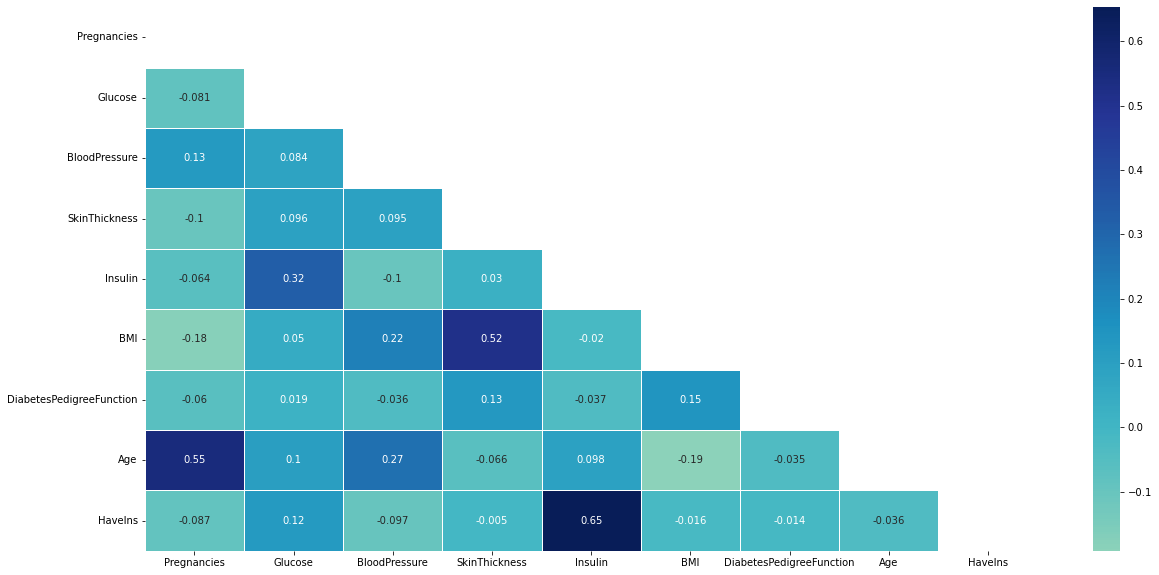

In [123]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(posCor, dtype=bool))
sns.heatmap(posCor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

One last thing that jumps out - the insulin column. If you are (type 1 fully) diabetic, you may have no insulin in your system. If you're type 2, you'd expect insulin to skyrocket. What if we split the data along that line?

Part 8: Segregate Insulin Havers 

In [ ]:
#Look for correlations
sns.distplot(d_pos["Insulin"], color="green", bins=100)
plt.show()

In [113]:
#Split into two groups. 
d_pos["HaveIns"] = (d_pos["Insulin"] > 50)
d_pos.head()

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_50635/720810898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_pos["HaveIns"] = (d_pos["Insulin"] > 50)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HaveIns
0,6,8.214008,72,35,0,33.6,0.627,50,1,False
4,0,7.603508,40,35,168,43.1,2.288,33,1,True
6,3,4.329004,50,32,88,31.0,0.248,26,1,True
8,2,10.933511,70,45,543,30.5,0.158,53,1,True
13,1,10.489510,60,23,846,30.1,0.398,59,1,True


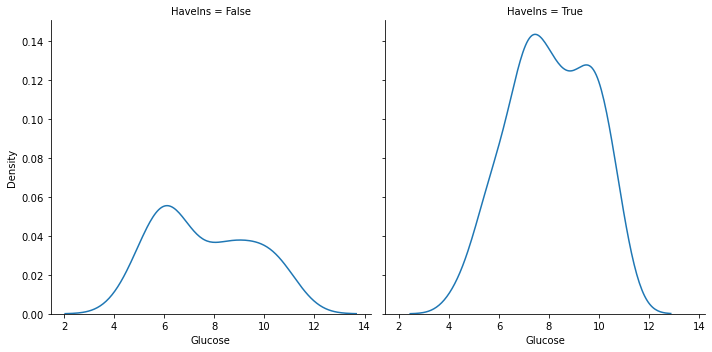

In [117]:
#Look at glucose for both
sns.displot(data=d_pos, x="Glucose", kind="kde", col="HaveIns")

In [ ]:
#Plot Insulin-y people for correlations. 
sns.pairplot(d, dropna=True, kind="reg")
plt.show()